# Airbnb Singapore 

Airbnb is an online marketplace which lets people rent out their properties or spare rooms to guests.
Airbnb operates through a C2C online marketplace model that provides a platform for people looking to rent out their homes for a duration of time. Hosts provide details of their listing in terms of price, location, availability and amenities that Airbnb that fit guests required criteria.

__The main objective of this project is to provide user best price/rate per night to spent on airbnb listings.__ The dataset used in this project is provided by *insideairbnb.com*, sourced from publicly available information from the Airbnb site(airbnb.com). 

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {'font.family':'serif'})
plt.style.use("seaborn-darkgrid")
color = ['#fccbcb','#F99797', '#F76C6C', '#ABD0E6', '#23305E']
cmap = ListedColormap(color)
warnings.filterwarnings("ignore")
%matplotlib inline

**Features yang digunakan :** <br>
1. numeric : bedrooms, accommodates, host_is_superhost <br>
2. categories : area, property_type, room_type <br>
3. target : total_price

In [2]:
df = pd.read_csv('data-airbnbsg_cleaned.csv')

num = ['bedrooms', 'accommodates', 'total_price', 'host_is_superhost']
categories = ['property_type', 'room_type','area']

In [3]:
df = df.dropna(subset= ['bedrooms', 'accommodates','area', 'property_type', 'room_type', 'host_is_superhost'])

In [4]:
# Labelling categorical features
dfdum = pd.get_dummies(df[categories])
dfnew = df[num]
dfnew = pd.concat([dfnew, dfdum], axis=1)
dfX = dfnew.drop(['total_price'], axis=1)
dfY = dfnew['total_price']

In [5]:
# Splitting train & test data
from sklearn.model_selection import train_test_split, KFold
xtrain, xtest, ytrain, ytest = train_test_split(
    dfX, dfY, 
    test_size= .1,
    random_state = 0
    )

## 1.  Linear Regression Model 

Skor Linear : 26.0 %
Skor Linear R2 :  0.26240670747572126
RMSE Linear:  91.75858350261022


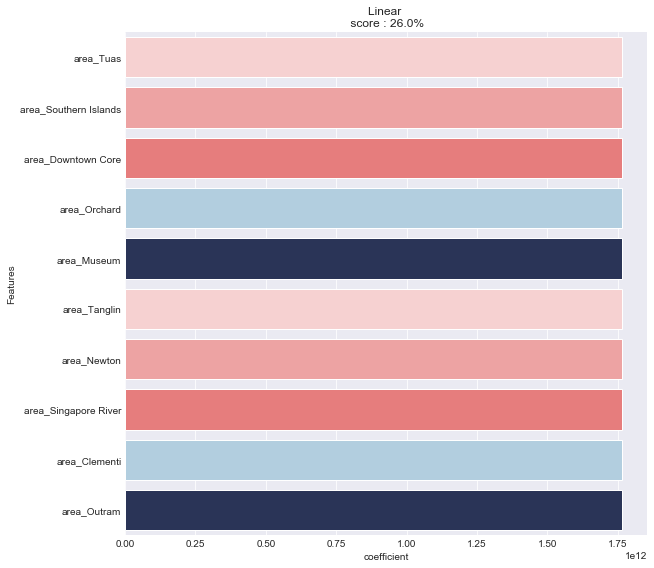

In [6]:
from sklearn.linear_model import Lasso, LinearRegression

modelLin = LinearRegression()
modelLin.fit(xtrain, ytrain)
predLin = modelLin.predict(xtest)
skorLin = modelLin.score(xtest, ytest)
df_Lin = pd.DataFrame({'coefficient' : modelLin.coef_, 'features' : xtrain.columns.values})
print('Skor Linear :', round(skorLin, 2)*100, '%')
print('Skor Linear R2 : ', r2_score(ytest, predLin))
print('RMSE Linear: ', mean_squared_error(ytest, predLin)** 0.5)
# print(df_Lin.sort_values(by='coefficient', ascending=False))

fig = plt.figure(figsize=(10,8))
ax = sns.barplot(
    x= 'coefficient',
    y= 'features', data= df_Lin.sort_values(by='coefficient', ascending= False).head(10), palette=color)

plt.ylabel('Features')
plt.title('Linear \n score : {}%'.format(round(skorLin, 2)*100))

plt.tight_layout()
plt.subplots_adjust(left= .26)

## 2.  Lasso Model 

Skor Lasso : 27.0 %
Skor Lasso R2 :  0.26820035616570514
RMSE Lasso:  91.39750032902543


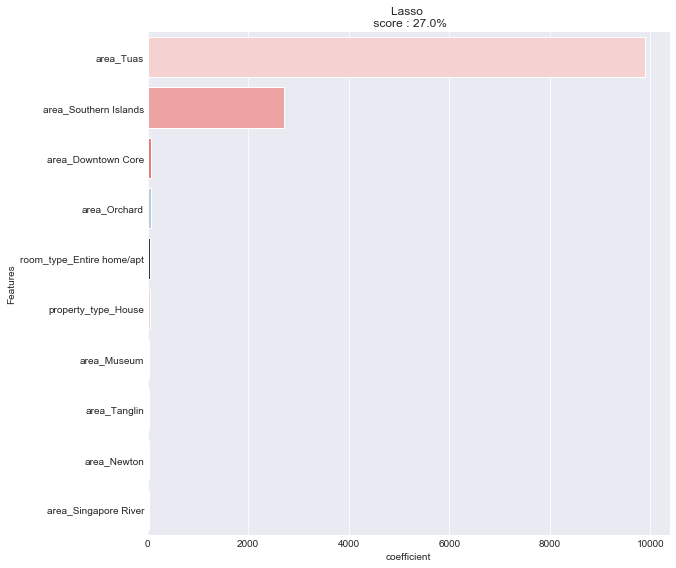

In [7]:
modelL = Lasso(alpha=.01)
modelL.fit(xtrain, ytrain)
predL = modelL.predict(xtest)
skorL = modelL.score(xtest, ytest)
df_L = pd.DataFrame({'coefficient' : modelL.coef_, 'features' : xtrain.columns.values})
print('Skor Lasso :', round(skorL, 2)*100, '%')
print('Skor Lasso R2 : ', r2_score(ytest, predL))
print('RMSE Lasso: ', mean_squared_error(ytest, predL)** 0.5)
# print(df_L.sort_values(by='coefficient', ascending=False))
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(
    x= 'coefficient',
    y= 'features', data= df_L.sort_values(by='coefficient', ascending= False).head(10), palette=color)

plt.ylabel('Features')
plt.title('Lasso \n score : {}%'.format(round(skorL, 2)*100))

plt.tight_layout()
plt.subplots_adjust(left= .26)

## 3.  Decision Tree Regressor Model 

Skor DT : 74.0 %
Skor DT R2 :  0.7361225700861123
RMSE DT:  54.88318973915124


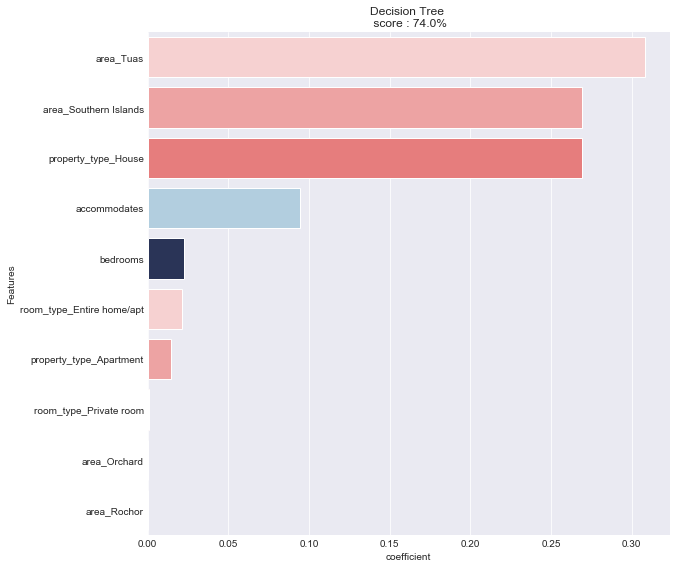

In [8]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor(max_depth=5)
modelDT.fit(xtrain, ytrain)

skorDT = modelDT.score(xtest, ytest)
predDT = modelDT.predict(xtest)
df_DT = pd.DataFrame({'coefficient' : modelDT.feature_importances_, 'features' : xtrain.columns.values})
print('Skor DT :', round(skorDT, 2)*100, '%')
print('Skor DT R2 : ', r2_score(ytest, predDT))
print('RMSE DT: ', mean_squared_error(ytest, predDT)** 0.5)
# print(df_DT.sort_values(by='coefficient', ascending=False))

fig = plt.figure(figsize=(10,8))
sns.barplot(
    x= 'coefficient',
    y= 'features',data= df_DT.sort_values(by='coefficient', ascending= False).head(10), palette=color)

plt.ylabel('Features')

plt.title('Decision Tree \n score : {}%'.format(round(skorDT, 2)*100))
plt.tight_layout()
plt.subplots_adjust(left= .26)


## 4.  Random Forest Regressor Model 

Skor RTF : 80.0 %
Skor RTF R2: 0.7969722200914651
RMSE RTF:  48.141093866338124


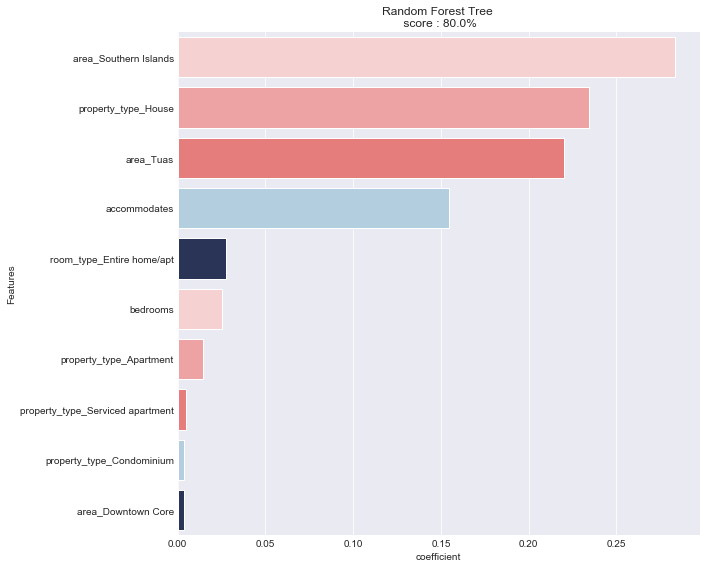

In [9]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(xtrain, ytrain)
df_RF = pd.DataFrame({'coefficient' : modelRF.feature_importances_, 'features' : xtrain.columns.values})
predRF = modelRF.predict(xtest)
skorRF =modelRF.score(xtest, ytest)
print('Skor RTF :', round(skorRF, 2)*100, '%')
print('Skor RTF R2:', r2_score(ytest, predRF))
print('RMSE RTF: ', mean_squared_error(ytest, predRF)** 0.5)
# print(df_RF.sort_values(by='coefficient', ascending=False))

fig = plt.figure(figsize=(10,8))
sns.barplot(
    x= 'coefficient',
    y= 'features',data= df_RF.sort_values(by='coefficient', ascending= False).head(10), palette=color)

plt.ylabel('Features')
plt.title('Random Forest Tree \n score : {}%'.format(round(skorRF, 2)*100))
plt.tight_layout()
plt.subplots_adjust(left= .26)

## 5.  Gradient Boosting Regressor Model 

Skor GBR : 81.0 %
Skor GBR R2: 0.808923671394837
RMSE GBR:  46.70266519747565


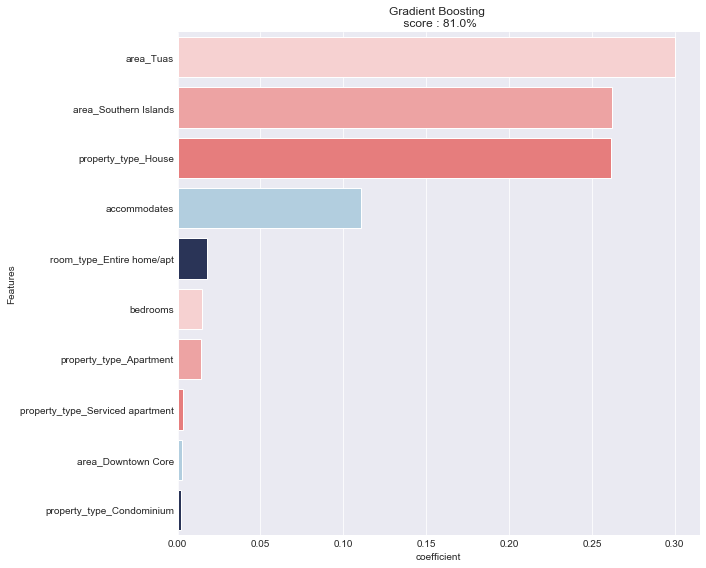

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
modelGB = GradientBoostingRegressor(max_depth=5)
modelGB.fit(xtrain, ytrain)
df_GB = pd.DataFrame({'coefficient' : modelGB.feature_importances_, 'features' : xtrain.columns.values})
predGB = modelGB.predict(xtest)
skorGB = modelGB.score(xtest, ytest)
print('Skor GBR :', round(skorGB, 2)*100, '%')
print('Skor GBR R2:', r2_score(ytest, predGB))
print('RMSE GBR: ', mean_squared_error(ytest, predGB)** 0.5)
# print(df_GB.sort_values(by='coefficient', ascending=False))

fig = plt.figure(figsize=(10,8))
sns.barplot(
    x= 'coefficient',
    y= 'features',data= df_GB.sort_values(by='coefficient', ascending= False).head(10), palette=color)

plt.ylabel('Features')
plt.title('Gradient Boosting \n score : {}%'.format(round(skorGB, 2)*100))
plt.tight_layout()
plt.subplots_adjust(left= .26)
plt.show()